In [44]:
import pandas as pd
import numpy as np 
import scipy.stats as sts
import seaborn as sns 
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import statsmodels as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("ad data.csv")
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


# Сбор и обработка данных, разведочный анализ данных, визуализация

#### Сколько в датасете строк и столбцов?

In [2]:
df.shape

(128061, 9)

При первичном осмотре данных мы видим, что в датасете 128061 строки и 9 столбцов

#### Опишите признаки в датасете. Какие признаки количественные, категориальные, номинальные?

In [3]:
df.dtypes

Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

Описание признаков:

**Age** - возраст опрошенного (количественный)

**Gender** - пол опрошенного (номинальный)

**Education** - бинарная переменная: высшее образование или выше (1); неполное высшее или ниже (0) (номинальный)

**Introversion Score** - Непрерывная переменная от 0 до 10, представляющая тенденцию опрошенного к интроверсии против экстраверсии. Более высокие оценки указывают на большую склонность к экстраверсии (количественный)

**Sensing Score** - Непрерывная переменная от 0 до 10, представляющая предпочтение опрошенного к аналитическим решениям по сравнению с интуицией. Более высокие оценки указывают на предпочтение аналитики. (количественный)

**Thinking Score** - Непрерывная переменная от 0 до 10, указывающая на индивидуальное предпочтение к объективному принятию решений по сравнению с субъективным. Более высокие оценки указывают на предпочтение принятий решений объективно (количественный)

**Judging Score** - Непрерывная переменная от 0 до 10, представляющая предпочтение индивидуума по отношению к планированию или спонтанному принятию решений. Более высокие оценки указывают на предпочтение в составлении планов (количественный)

**Interest** - основная сфера интереса опрошенного (номинальный)

**Personality** - тип личности опрошенного (исследуемая переменная, номинальный)


#### Есть ли пропуски в данных? Если да, выберите способ обработки пропусков для каждого столбца. Расскажите, почему выбрали именно этот способ. Обработайте пропуски

In [4]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

Видим, что в датасете нет пропусков, поэтому нам нет необходимости их заменять или удалять

#### Есть ли в данных полные дубликаты? Удалите их, если да.

In [5]:
df.duplicated().sum()

0

В нашем датасете нет полных дубликатов

#### Есть ли в данных выбросы? С помощью каких критериев вы их определяете? Удалите выбросы

В этом датасете нет характеристик, по которым можно было было найти выбросы и их удалить. 4 метрики заключены в отрезок [0;10], поэтому там не может быть выбросов, влияющих на наш показатель. Выбрасывать возраст тоже нельзя, тк он заключен между 18 и 57 годами, к тому же возрастная группа может сильно влиять на тип личности. А исследуемая переменная у нас номинальная, поэтому у нее найти выбросы тоже не представляется возможным. Следовательно, оставляем датасет в исходном виде.

#### Посчитайте описательные статистики по переменным (метод describe). Проинтерпретируйте их по хотя бы одной количественной и одной категориальной переменным, приведя наиболее интересные и неочевидные факты

In [6]:
#Перекодируем категориальные данные, чтобы их можно было описать
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  int64  
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 8.8+ MB
None


In [7]:
df.describe().round(3)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000,128061.000,128061.000,128061.000,128061.000,128061.000,128061.000
mean,26.349,0.550,0.411,4.996,5.082,4.988,4.578
std,4.908,0.497,0.492,2.889,1.183,2.886,1.392
min,18.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,23.000,0.000,0.000,2.491,4.316,2.489,3.709
50%,25.000,1.000,0.000,4.994,5.124,4.984,4.691
75%,29.000,1.000,1.000,7.500,5.892,7.493,5.561
max,57.000,1.000,1.000,10.000,9.789,10.000,9.840


Рассмотрим переменную возраста. Обратим внимание, что средний возраст респондентов составляет чуть более 26 лет, при минимальных и максимальных значениях в 18 и 57 лет соответственно. Согласно 2 квартилю, 50% ответов было получено от людей 25 лет и моложе, следовательно можно сделать вывод, что в опросе участвовала преимущественно молодежь. Это же подтверждается тем, что 75% выборки имеет возраст менее 29 лет. Значение std равное 4,9 означает, что в среднем данные отличаются от среднего значения mean на 4,9 лет

Если обратить внимание на переменную пола, то можно заметить, что среднее значение равно 0,55,что означает, что, как это ни странно, в выборке больше мужчин, чем женщин. std равное 0,497 говорит что в среднем данные отличаются от среднего значения mean на 0,497 у.е. гендера. 

# Визуализация

In [45]:
fig = px.pie(df['Personality'], values = df['Personality'].value_counts(), 
             names = df['Personality'].unique(), 
             title = 'Доли типов личности')
fig.show()

In [42]:
# Count the values in the 'Personality' column
personality_counts = df['Personality'].value_counts().reset_index()
personality_counts.columns = ['Personality', 'Count']

# Create the pie chart using the processed DataFrame
fig = px.pie(personality_counts, values='Count', names='Personality', title='Доли типов личности')
fig.show()


По полученному пайчарту можно видеть, что ENFP, ESFP и INTP являются самыми часто встречающимися типами личности с общим процентом в 65,5% наблюдений в выборке , в то время как ESTJ, ISTJ и ISFJ - самые редкие типы личности с суммарным процентом в 0,8%.

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs)

fig.add_trace(go.Pie(labels = df['Interest'].unique(), 
                     values = df['Interest'].value_counts(), 
                     name = 'Interest', 
                     title = 'Доли сфер интересов'), 
              1, 1)
fig.add_trace(go.Pie(labels = df['Gender'], 
                     values = df['Gender'].value_counts(), 
                     name = 'Gender',
                    title = 'Доли мужчин и женщин'),
              1, 2)
fig.add_trace(go.Pie(labels = df['Education'].unique(), 
                     values = df['Education'].value_counts(), 
                     name = 'Education',
                    title = 'Доли по уровню образования'), 
              1, 3)

fig.update_traces(hoverinfo='label+percent+value+name', textinfo='none')
fig.update(layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

Также рассмотрим пайчарты по переменным Интерес, Пол и Уровень образования. Получаем, что большую часть респондентов (38%) отказались комментировать свою сферу интересов или она не попала в стандартные группы, а самой малочисленной оказалась сфера творчества. 
Говоря о гендерном соотношении, из графика видно преобладание мужчин на 10%
По уровню образования можно сделать вывод, что в основном (59%) были опрошены люди не окончившие или не имевшие высшее образование. Это, в общем и целом, логично, тк средний возраст респондентов, как было показано выше, 26 лет

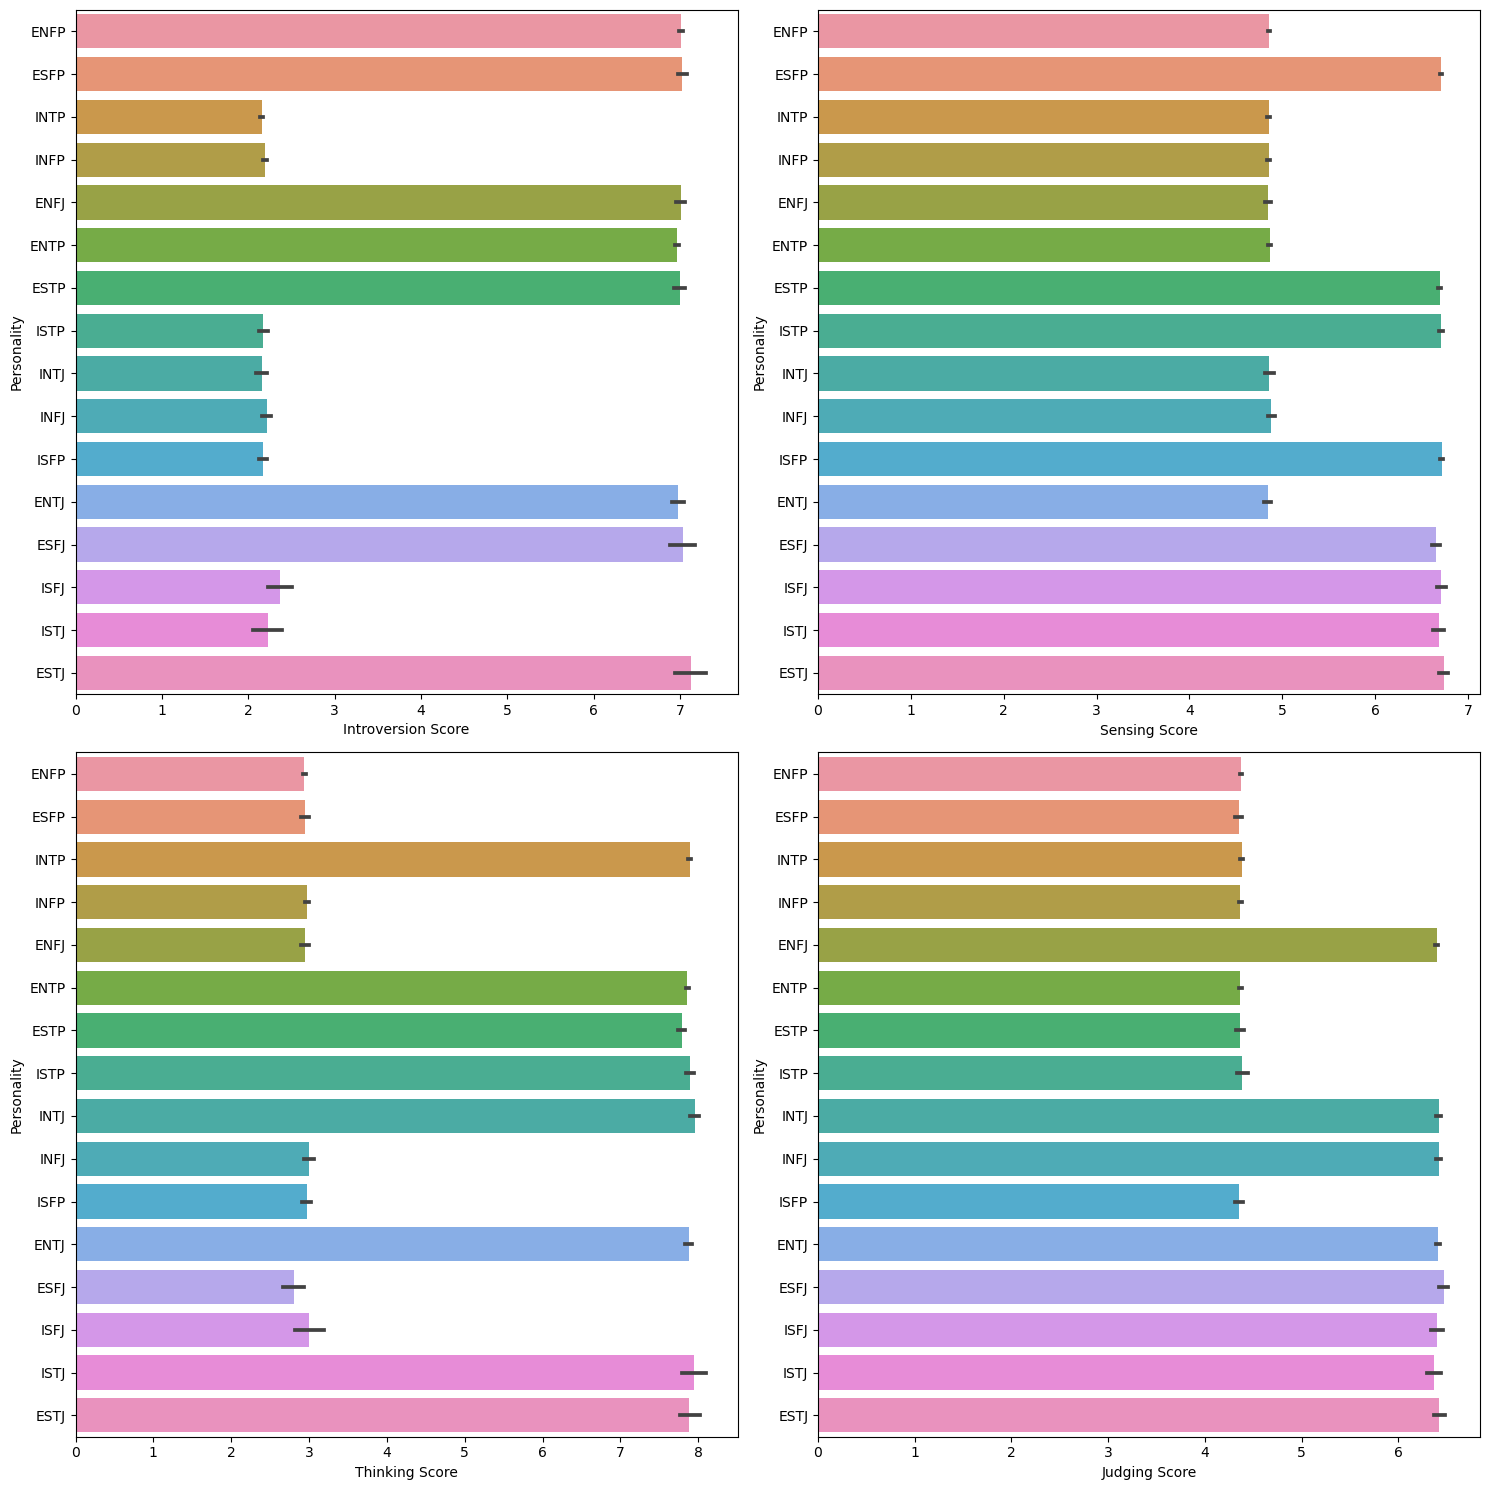

In [12]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.barplot(data=df, y='Personality', x='Introversion Score', estimator='mean',ax=ax[0][0])
sns.barplot(data=df, y='Personality', x='Sensing Score', estimator='mean',ax=ax[0][1])
sns.barplot(data=df, y='Personality', x='Thinking Score', estimator='mean',ax=ax[1][0])
sns.barplot(data=df, y='Personality', x='Judging Score', estimator='mean',ax=ax[1][1])
plt.tight_layout() #анализирует размеры и расположение всех элементов графика и корректирует их, чтобы обеспечить оптимальное отображение
plt.show()

На графиках видно, результаты по каким аспектам жизни преобладают в каждом из существующих типах личности. 

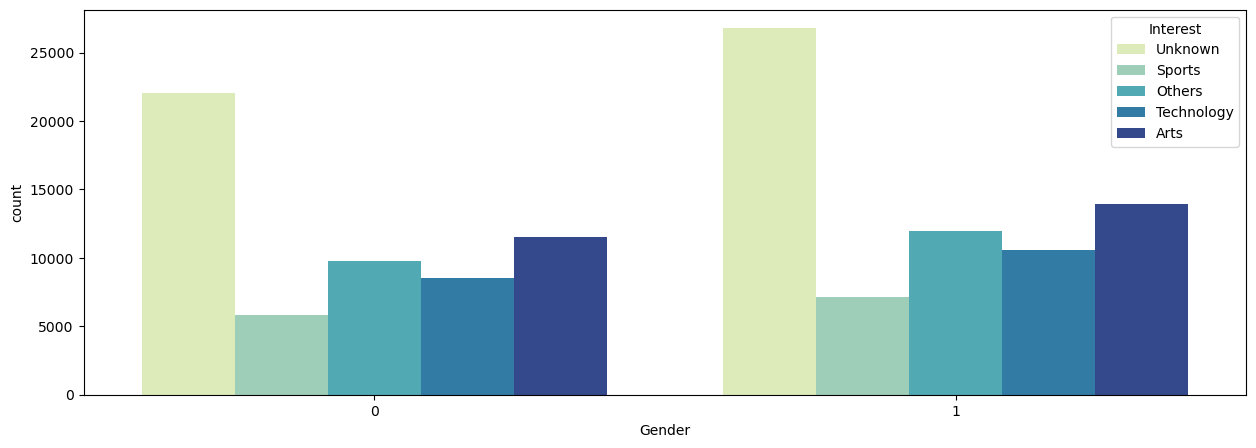

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender',hue='Interest',palette='YlGnBu')
plt.show()

На графике представлено количества мужчин и женщин по категориям интересов. Интересно, что доли, по которым распредляются сферы внутри гендерных групп практически идентичны. 

#### Постройте матрицу корреляций по количественным переменным, опишите зависимости, которые обнаружили. Какие выводы можно сделать?

In [14]:
#Перекодируем категориальные данные, чтобы их можно было использовать в корреляционной матрице
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  int64  
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  int64  
 8   Personality         128061 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 8.8 MB
None


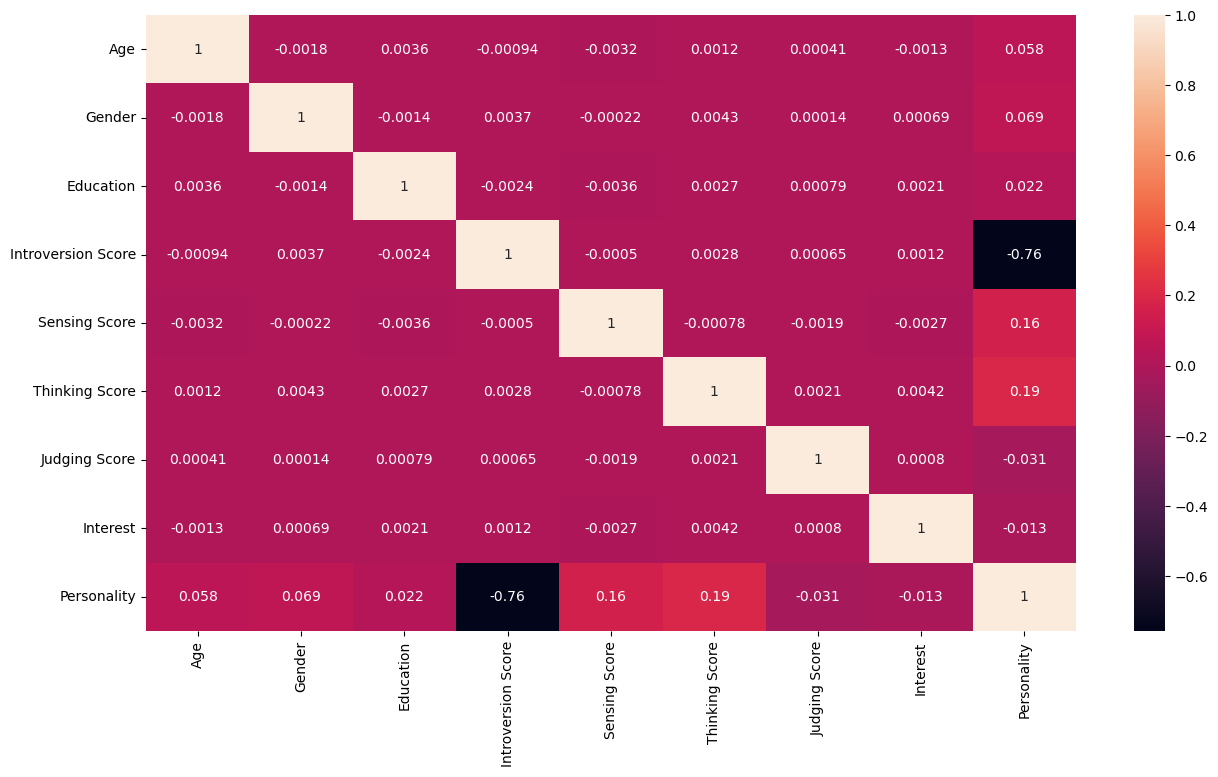

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

По составленной корреляционной матрице можно увидеть, что, если перекодировать типы личности в числа от 1 до 16, где кодировка будет идти по алфавиту, то коэффициент интроверсии будет иметь сильную отрицательную корреляцию с признаком типа личности, в то время как коэффицент объективности и анализа имеют слабую положительную корреляцию. 

Все остальные связи около 0, следовательно практически не зависят друг от друга. 

Важно отметить, что матрица показывает такие зависимости только при конкретном методе перекодировки.

# Тестирование гипотез с хи-квадрат и t-тест. Сформулируйте 3 гипотезы (по одной для каждого типа стат теста) по вашим данным, которые можно проверить с помощью критерия независимости хи-квадрат, одновыборочного и двухвыборочного t-теста. Проверьте гипотезы.Какие выводы можно сделать? 

1. Предположим, что средний возраст людей, которые проходят тесты на определение типа личности составляет 26 лет, тк это  пополярный тренд среди молодежи в данный момент

$$
\begin{aligned}
&H_о: μ=26 \\
&H_а: μ≠26
\end{aligned}
$$

In [16]:
#считаем p-value
result = stats.ttest_1samp(a=df['Age'],                    # выборка
                           popmean=26,                # ожидаемое математическое ожидание
                           alternative='two-sided') 
result

TtestResult(statistic=25.453125449758996, pvalue=1.4788678313089754e-142, df=128060)

Проверим значимость полученных результатов

In [17]:
print(result.pvalue > 0.1)    #уровень значимости 10%
print(result.pvalue > 0.05)   #уровень значимости 5%
print(result.pvalue > 0.01)   #уровень значимости 1%

False
False
False


Видим, что p-value значительно ниже, чем стандартный уровень значимости 
$$\begin{aligned} 
α = 0.05
\end{aligned}
$$
так что нулевая гипотеза **отвергается**

### Тест на согласованность 𝜒2

Тест на определение личности прошло 128061 человек (fact). Проверим гипотезу о том, что ожидаемое распределение сдавших тест совпадает с тем, которое было раньше и считается общепринятым

In [18]:
df['Personality'].value_counts()

1     34404
3     24718
9     24711
11    17132
5      4832
0      3883
13     3456
7      3334
8      2919
2      2783
15     2390
10     1920
4       554
6       392
12      371
14      262
Name: Personality, dtype: int64

In [19]:
data = pd.DataFrame()
data.index = ["ENFP", "ENTP", "INFP", "INTP", 'ESFP', 'ENFJ', 'ISFP', 'ESTP', 'INFJ', 'ENTJ', 'ISTP', 'INTJ', 'ESFJ', 'ESTJ', 'ISFJ', 'ISTJ']
data["fact"] = [34404, 24718, 24711, 17132, 4832, 3883, 3456, 3334, 2919, 2783, 2390, 1920, 554, 392, 371, 262]
data["exp_rate"] = [0.080, 0.032, 0.044, 0.033, 0.085, 0.025, 0.088, 0.043, 0.015, 0.018, 0.054, 0.021, 0.122, 0.087, 0.138, 0.115]
data

,fact,exp_rate
ENFP,34404,0.080
ENTP,24718,0.032
INFP,24711,0.044
INTP,17132,0.033
ESFP,4832,0.085
ENFJ,3883,0.025
ISFP,3456,0.088
ESTP,3334,0.043
INFJ,2919,0.015
ENTJ,2783,0.018


$ H_0 $ : Наблюдаемые данные согласуются с ожидаемой вероятностью

In [20]:
data['exp'] = data["exp_rate"]*(data["fact"].sum())
data

,fact,exp_rate,exp
ENFP,34404,0.080,10244.880
ENTP,24718,0.032,4097.952
INFP,24711,0.044,5634.684
INTP,17132,0.033,4226.013
ESFP,4832,0.085,10885.185
ENFJ,3883,0.025,3201.525
ISFP,3456,0.088,11269.368
ESTP,3334,0.043,5506.623
INFJ,2919,0.015,1920.915
ENTJ,2783,0.018,2305.098


In [21]:
result = stats.chisquare(data['fact'], #наблюдаемые значения
                data['exp']) #ожидаемые значения
result

Power_divergenceResult(statistic=334361.03259741724, pvalue=0.0)

#### Выводы

In [22]:
print(result.pvalue > 0.1)    #уровень значимости 10%
print(result.pvalue > 0.05)   #уровень значимости 5%
print(result.pvalue > 0.01)   #уровень значимости 1%

False
False
False


Получаем, что гипотеза не значима на всех уровнях значимости, следовательно нулевая гипотеза **отвергается**

 3. Проверим гипотезу о равентсве средних значений параметров "Thinking Score" и "Sensing Score" 

$$
\begin{aligned}
&H_о: μ_t=μ_s \\
&H_а: μ_t≠μ_s
\end{aligned}
$$

In [23]:
t_2 = stats.ttest_rel(a = df['Thinking Score'], b = df['Sensing Score'])
t_2

TtestResult(statistic=-10.764577281214043, pvalue=5.195950343428356e-27, df=128060)

### Выводы

In [30]:
print(result.pvalue > 0.1)    #уровень значимости 10%
print(result.pvalue > 0.05)   #уровень значимости 5%
print(result.pvalue > 0.01)   #уровень значимости 1%

False
False
False


Получаем, что гипотеза не значима на всех уровнях значимости, следовательно нулевая гипотеза **отвергается**

# Задача классификации 

Наши данные имеют целевую переменную, выраженную в 16 уникальных номинальных значениях. Поэтому мы будем проводить задачу классификации с помощью модели случайного леса. Также нам надо перекодировать значения по столбцам "Пол" и "Interest"

In [25]:
df_rf = df
df_rf['Gender'] = df['Gender'].apply(lambda x: '1' if x == 'Male' else '0')
def change(x):
    if x == 'Unknown':
        return 0
    elif x == 'Sports':
        return 1
    elif x == 'Others':
        return 2
    elif x == 'Technology':
        return 3
    else:
        return 4
df_rf['Interest'] = df['Interest'].apply(change)

Теперь, чтобы построить модель, нам необходимо выделить исследуюмую переменную и признаки, по которым мы будем ее определять

In [26]:
X = df_rf.drop('Personality', axis=1)  
y = df_rf['Personality']
#делим на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

Для начала проведем проверку, какой набор параметров модели является оптимальным с помощью решетчатого (Grid Search) подхода

In [29]:
# Определение параметров и их значений для перебора
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели и настройка с использованием решетчатого поиска
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Cross-Validation Score: 0.8349894389163957


Мы получили оптимальные параметры модели. Теперь перейдем к ее исследованию и описанию.

In [37]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf = 1, max_depth = 10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [38]:
y_pred = model.predict(X_test)

# Проверка оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Дополнительная оценка
print(classification_report(y_test, y_pred))

Accuracy: 0.8365673681333697
              precision    recall  f1-score   support

           0       0.93      0.73      0.81       799
           1       0.91      0.84      0.87      6963
           2       0.84      0.74      0.79       531
           3       0.82      0.87      0.84      4989
           4       0.82      0.70      0.76       101
           5       0.87      0.72      0.79       981
           6       0.85      0.71      0.77        78
           7       0.75      0.74      0.75       633
           8       0.84      0.76      0.80       611
           9       0.82      0.87      0.84      4895
          10       0.80      0.74      0.77       362
          11       0.77      0.91      0.83      3415
          12       0.80      0.52      0.63        75
          13       0.78      0.72      0.75       670
          14       0.80      0.77      0.79        48
          15       0.73      0.79      0.76       462

    accuracy                           0.84     256

#### Можно заметить, что точность предсказания модели, указанное по метрике "accuracy" равна 0,8366. Следовательно, у нашей модели 83,6% значений предсказывается верно.

In [39]:
print(confusion_matrix(y_test, y_pred))

[[ 580   86   42   13    6    0    0    0   62   10    0    0    0    0
     0    0]
 [   0 5820    0  483    0   41    0    6    0  601    0    7    0    5
     0    0]
 [  10    0  394   73    0    0    6    2    4    0   32    9    0    0
     1    0]
 [   0  110    0 4325    0    1    0   40    0   29    0  478    0    0
     0    6]
 [   8    1    0    0   71   12    3    0    2    0    0    0    4    0
     0    0]
 [   0   98    0    8    0  709    0   64    0   15    0    1    0   84
     0    2]
 [   1    0   10    1    0    0   55    6    0    0    1    0    0    0
     3    1]
 [   0    3    0   82    0   15    0  470    0    0    0   10    0    1
     0   52]
 [  25    5    5    1    0    0    0    0  463   73   33    3    3    0
     0    0]
 [   0  246    0   63    0    4    0    3    0 4240    0  308    0   27
     0    4]
 [   0    0   17    3    0    0    0    0    9    0  267   61    1    0
     4    0]
 [   0    1    0  194    0    0    0    4    0   82    1 3105    

Также покажем матрицу ошибок, по которой видно, что наибольшее количество ошибок равно 5820, что составляет около 4,6% от нашей выборки 